In [46]:
from ctgan import CTGAN
from ctgan import load_demo

import geopandas as gpd
import os
import pandas as pd

In [1]:
real_data = load_demo()

discrete_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'income'
]

ctgan = CTGAN(epochs=10)
ctgan.fit(real_data, discrete_columns)

synthetic_data = ctgan.sample(1000)

/home/paddy/miniconda3/envs/radian/lib/python3.11/site-packages/torch/autograd/graph.py:744: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [35]:
glasgow_pubs = gpd.read_file('glasgow_pubs.geojson')

#geometry -> lat + lon coordinates
#name 

pub_data = glasgow_pubs.loc[:,['name', 'geometry']]
pub_data['geometry'] = pub_data['geometry'].apply(lambda row: row.centroid if row.geom_type == 'Polygon' else row)
pub_data['x'], pub_data['y'] = pub_data.geometry.x, pub_data.geometry.y

pub_data = pub_data.loc[:, ['name', 'x', 'y']]
pub_data = pub_data[pub_data.name.notna()]

/home/paddy/miniconda3/envs/radian/lib/python3.11/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


In [41]:
disc = [
    'name'
]

pub_ctgan = CTGAN(epochs=10)
pub_ctgan.fit(pub_data, disc)

synth_pubs = pub_ctgan.sample(500)

In [44]:
gdf = gpd.GeoDataFrame(synth_pubs, geometry=gpd.points_from_xy(synth_pubs['x'], synth_pubs['y']))
print(gdf)
gdf.to_file('ctgan_pubs.geojson')

                           name         x          y  \
0                    Black Bull -4.249647  55.805397   
1                  Brass Monkey -4.246206  55.894092   
2                 Tennent's Bar -4.279098  55.845962   
3                Fiddlers Elbow -4.243470  55.869826   
4               The Atholl Arms -4.329467  55.855260   
..                          ...       ...        ...   
495                 The Griffin -4.289949  55.821208   
496             The Smokin' Fox -4.215543  55.842942   
497  Drury Street Bar & Kitchen -4.279520  55.828988   
498                The Londoner -4.256112  55.802751   
499         The Crown Creighton -4.225792  55.869175   

                      geometry  
0    POINT (-4.24965 55.80540)  
1    POINT (-4.24621 55.89409)  
2    POINT (-4.27910 55.84596)  
3    POINT (-4.24347 55.86983)  
4    POINT (-4.32947 55.85526)  
..                         ...  
495  POINT (-4.28995 55.82121)  
496  POINT (-4.21554 55.84294)  
497  POINT (-4.27952 55.82899)

<Axes: >

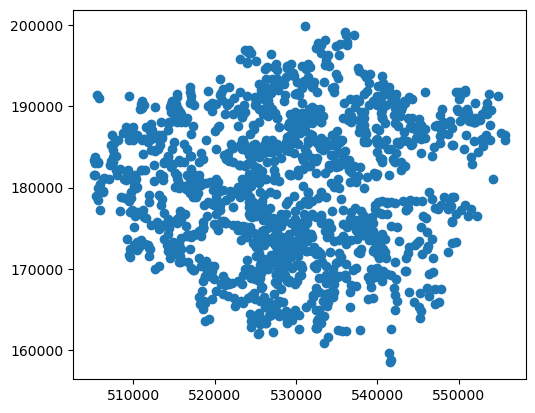

In [50]:
cdir = os.getcwd() 
path = os.path.dirname(cdir) + "/hpdemo.csv"

df = pd.read_csv(path)
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(x=df.east, y=df.north)
)

gdf.plot()